In [1]:
from interaction import show_molecule
import stk, stko
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
%matplotlib inline

In [2]:
smiles = 'O=C(O)c1ccccc1O'

In [3]:
mol = stk.BuildingBlock( smiles, [ stk.CarboxylicAcidFactory() ] )
show_molecule( mol )

interactive(children=(Dropdown(description='style', options=('stick', 'sphere'), value='stick'), Output()), _d…

<function interaction.draw_mol(p, style='stick')>

In [4]:
mol = stko.MMFF().optimize( mol )
show_molecule( mol )

interactive(children=(Dropdown(description='style', options=('stick', 'sphere'), value='stick'), Output()), _d…

<function interaction.draw_mol(p, style='stick')>

In [5]:
smiles_ = 'OCC'
mol_ = stk.BuildingBlock( smiles = smiles_ , functional_groups = [ stk.AlcoholFactory() ])
mol_ = stko.MMFF().optimize( mol_ )
show_molecule( mol_ )

interactive(children=(Dropdown(description='style', options=('stick', 'sphere'), value='stick'), Output()), _d…

<function interaction.draw_mol(p, style='stick')>

In [6]:
condensate = stk.ConstructedMolecule(
    topology_graph=stk.polymer.Linear(
        building_blocks=[mol, mol_],
        repeating_unit='AB',
        num_repeating_units=1,
    ),
)

show_molecule( condensate )

interactive(children=(Dropdown(description='style', options=('stick', 'sphere'), value='stick'), Output()), _d…

<function interaction.draw_mol(p, style='stick')>

In [7]:
condensate = stko.MMFF().optimize( condensate )
#stk.XyzWriter.write( condensate, 'condensate.xyz' )
show_molecule( condensate )

interactive(children=(Dropdown(description='style', options=('stick', 'sphere'), value='stick'), Output()), _d…

<function interaction.draw_mol(p, style='stick')>

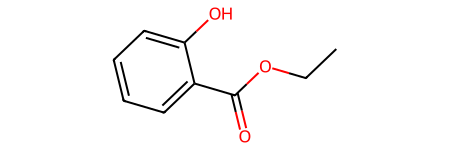

In [8]:
condensate = condensate.to_rdkit_mol()
condensate = Chem.RemoveHs( condensate )
AllChem.Compute2DCoords( condensate )
condensate

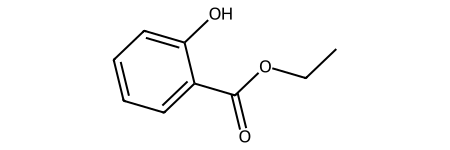

In [9]:
IPythonConsole.drawOptions.useBWAtomPalette()
condensate

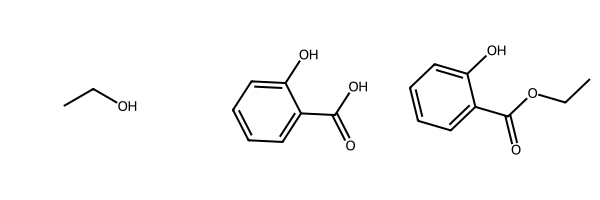

In [10]:
mol = Chem.RemoveHs( mol.to_rdkit_mol() )
mol_ = Chem.RemoveHs( mol_.to_rdkit_mol() )
for instance in [ mol, mol_ ]: AllChem.Compute2DCoords( instance )
mols = [ mol_, mol, condensate ]
Chem.Draw.MolsToGridImage( mols )